Notes:
- Suppose we want to estimate the difference between the mean of radius size of all benign and all malignant
tumor. To do so, we draw two samples, one from the population of malignant tumor and another
from the population of benign tumor. These two samples are independent because they
are drawn from two different populations, and the samples have no effect on each other.



In [2]:
library(ggplot2)

In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
dataset <- read.csv("data.csv", header = TRUE, sep = ",")

df <- dataset[-c(1)] # remove the row.ID column

head(df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


In [5]:
mdf <- df[df$diagnosis == "M", ] # group of Malignant tumor
bdf <- df[df$diagnosis == "B", ] # group of Benign tumor

Histogram of Variables

http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html

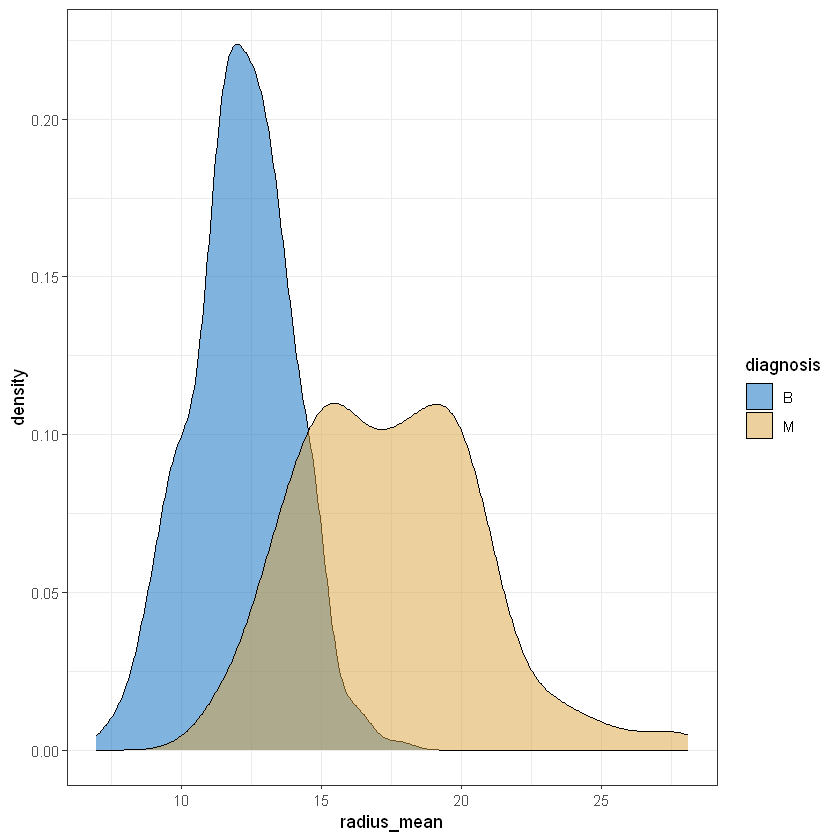

In [6]:
# Density plot + Histogram
p <- ggplot(df, aes(x=radius_mean, group=diagnosis,color=diagnosis)) + 
geom_histogram(aes(y=after_stat(density)), alpha=0.5, position="identity") +
  geom_density()

# Density Plot
dp <- ggplot(df, aes(x=radius_mean, group=diagnosis,fill=diagnosis)) +
geom_density(alpha=0.5) +
scale_fill_manual(values = c("#0468BF","#D9A23D")) + 
theme_bw()

dp

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


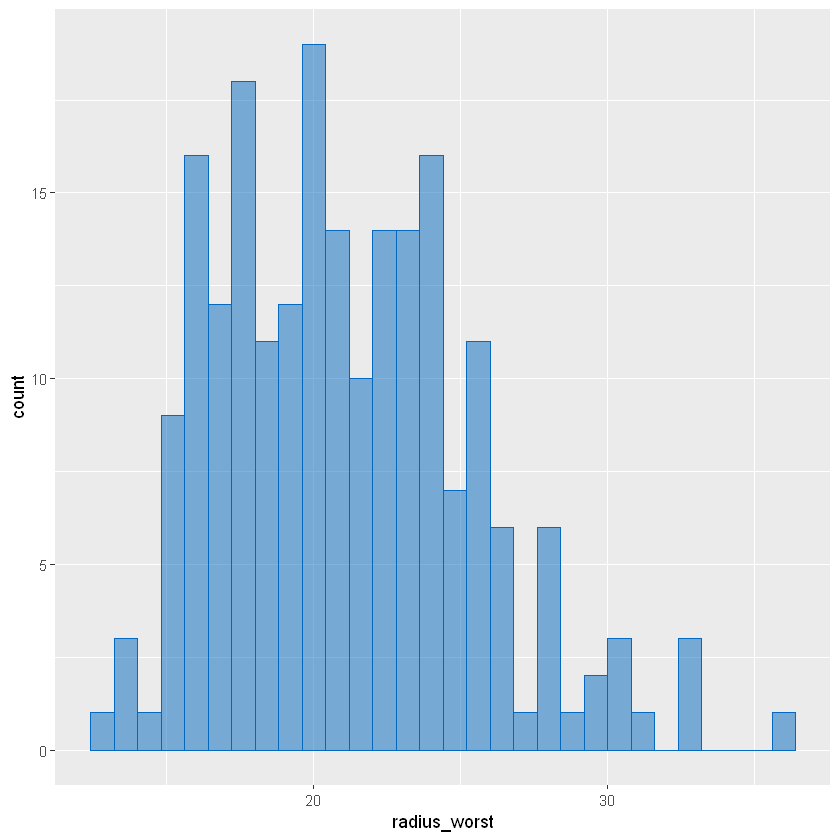

In [7]:
ggplot(mdf, aes(x=radius_worst))+
  geom_histogram(alpha=0.5, color="#0468BF", fill="#0468BF")

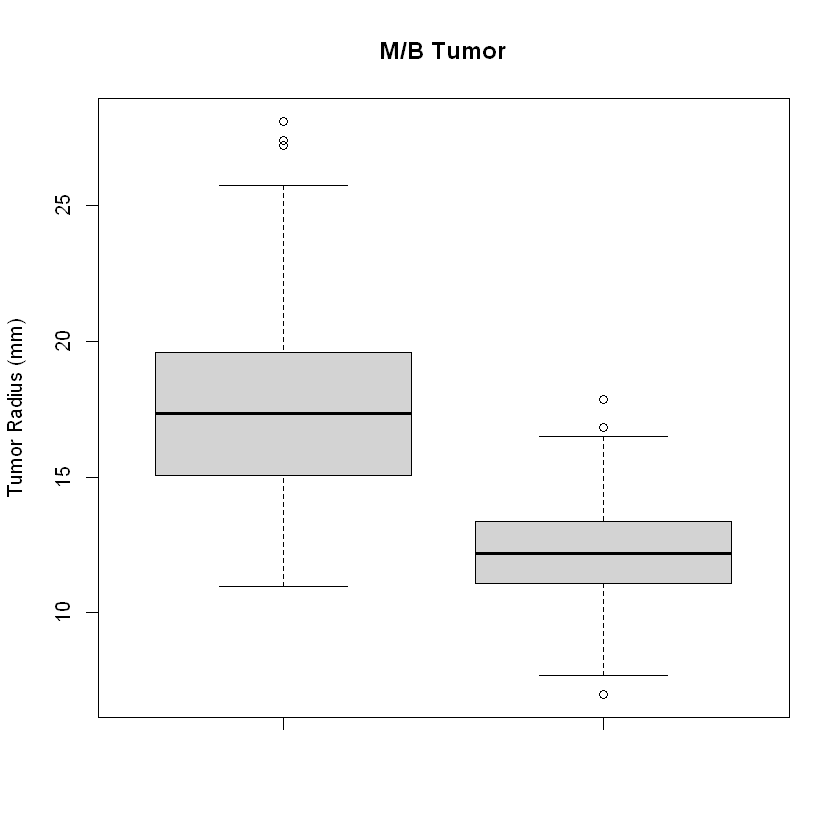

In [8]:
par(mfrow = c(1,1))
boxplot(mdf$radius_mean,bdf$radius_mean, main="M/B Tumor", ylab = "Tumor Radius (mm)")


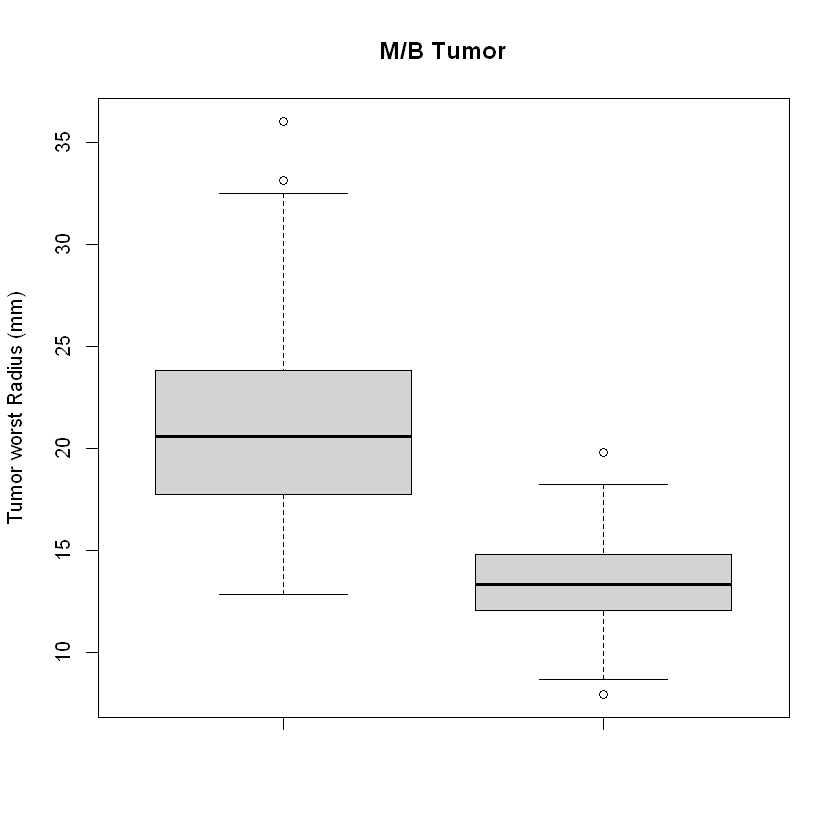

In [9]:
par(mfrow = c(1,1))
boxplot(mdf$radius_worst,bdf$radius_worst, main="M/B Tumor", ylab = "Tumor worst Radius (mm)")


In [10]:
#Radius_Mean Summury 
break_radius <- c(6, 8, 10, 12, 14, 18, 22, 26, 30)
mradius_abs_freq <- table(cut(df$radius_mean,break_radius))
mradius_rel_freq <- round(mradius_abs_freq/sum(mradius_abs_freq),3)
mradius_summary <- cbind(mradius_abs_freq,cumsum(mradius_abs_freq),mradius_rel_freq,cumsum(mradius_rel_freq))
colnames(mradius_summary) <- c(
  "Absolute",
  "Cum. absolute",
  "Relative",
  "Cum. relative")
mradius_summary

,Absolute,Cum. absolute,Relative,Cum. relative
"(6,8]",4,4,0.007,0.007
"(8,10]",43,47,0.076,0.083
"(10,12]",124,171,0.218,0.301
"(12,14]",166,337,0.292,0.593
"(14,18]",140,477,0.246,0.839
"(18,22]",78,555,0.137,0.976
"(22,26]",11,566,0.019,0.995
"(26,30]",3,569,0.005,1.000


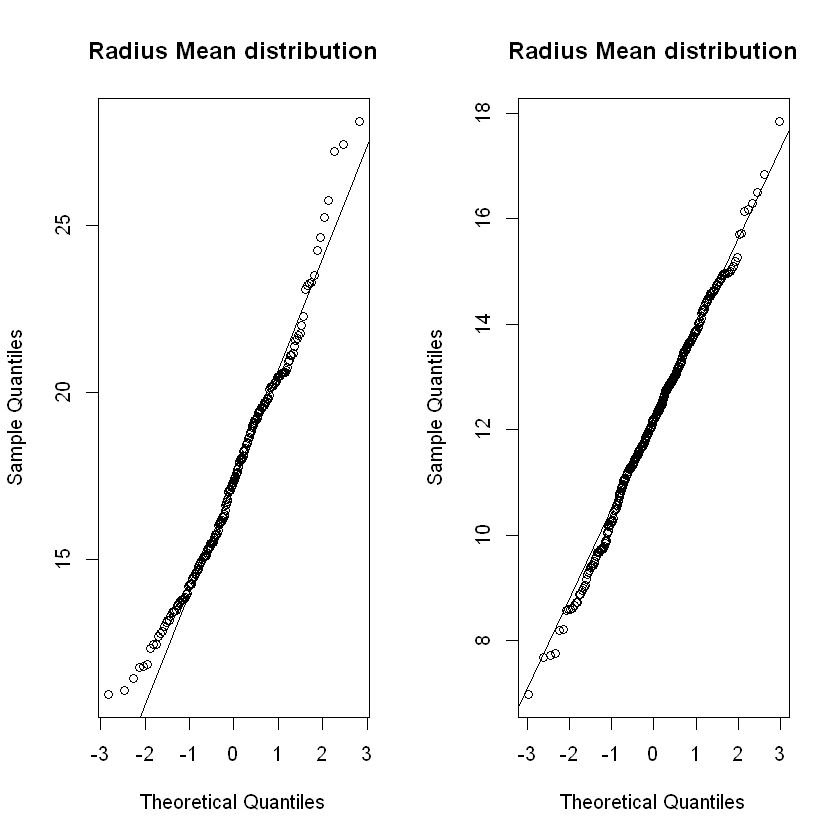

In [11]:
par(mfrow=c(1,2))
qqnorm(mdf$radius_mean, main = "Radius Mean distribution")
qqline(mdf$radius_mean)
qqnorm(bdf$radius_mean, main = "Radius Mean distribution")
qqline(bdf$radius_mean)


In [12]:
shapiro.test(mdf$radius_mean)
shapiro.test(bdf$radius_mean)
shapiro.test(df$radius_mean)



	Shapiro-Wilk normality test

data:  mdf$radius_mean
W = 0.97766, p-value = 0.001895



	Shapiro-Wilk normality test

data:  bdf$radius_mean
W = 0.99665, p-value = 0.668



	Shapiro-Wilk normality test

data:  df$radius_mean
W = 0.94107, p-value = 3.106e-14


We want to evaluate the

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


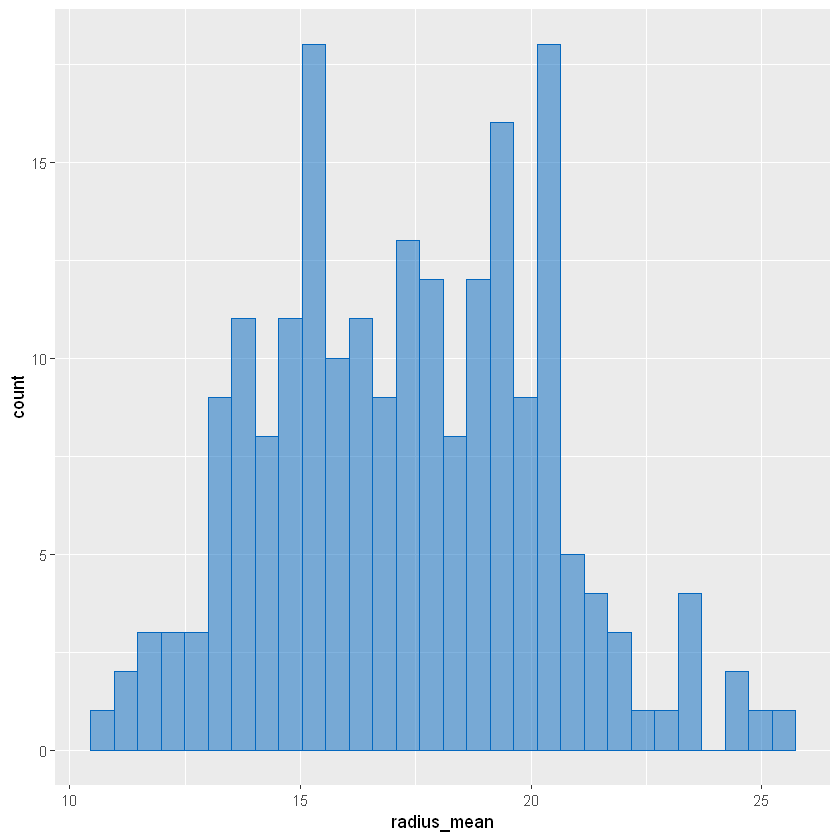


	Shapiro-Wilk normality test

data:  data_df_without_outliers$radius_mean
W = 0.98733, p-value = 0.05971


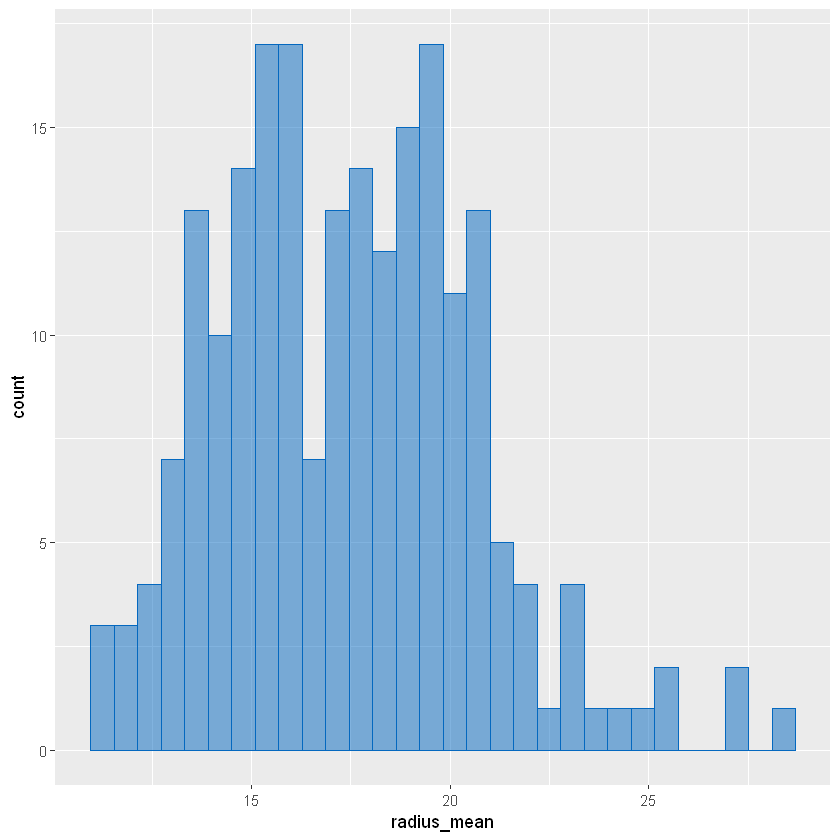

In [13]:
# Calculate the IQR
IQR <- IQR(mdf$radius_mean)

# Calculate the lower and upper bounds
lower_bound <- quantile(mdf$radius_mean, 0.25) - 1.5 * IQR
upper_bound <- quantile(mdf$radius_mean, 0.75) + 1.5 * IQR

# Remove outliers
data_df_without_outliers <- mdf %>%
  filter(mdf$radius_mean >= lower_bound & mdf$radius_mean <= upper_bound)

ggplot(data_df_without_outliers, aes(x=radius_mean))+
  geom_histogram(alpha=0.5, color="#0468BF", fill="#0468BF")
ggplot(mdf, aes(x=radius_mean))+
  geom_histogram(alpha=0.5, color="#0468BF", fill="#0468BF")
  shapiro.test(data_df_without_outliers$radius_mean)

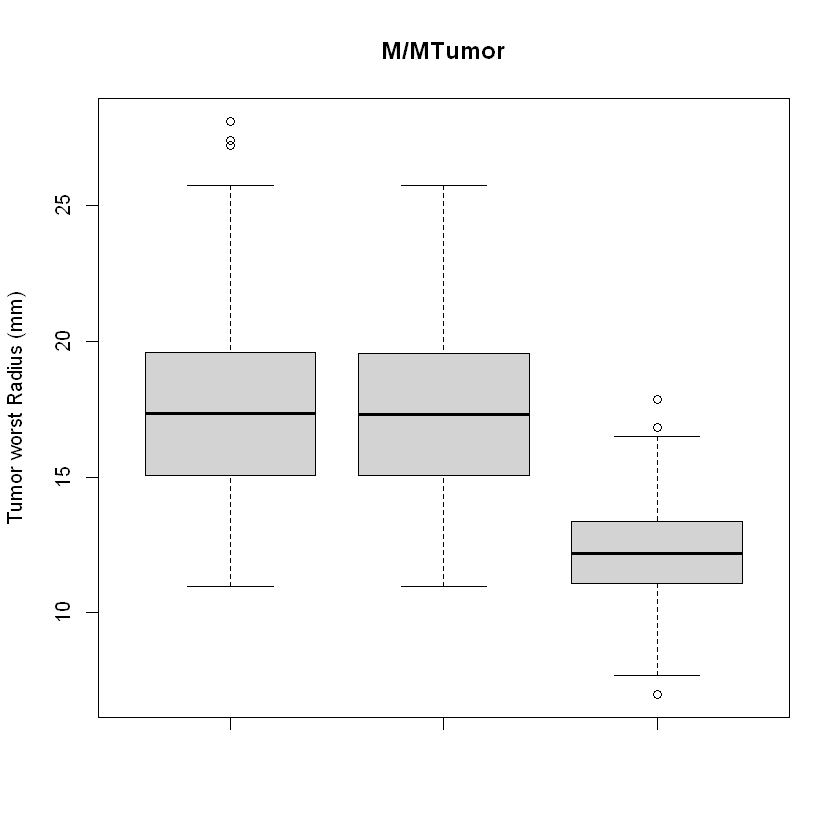

In [14]:
boxplot(mdf$radius_mean,data_df_without_outliers$radius_mean,bdf$radius_mean, main="M/MTumor", ylab = "Tumor worst Radius (mm)")

We want to estimate the difference between the mean of radius size of all benign and all malignant
tumor. To do so, we draw two samples, one from the population of malignant tumor and another
from the population of benign tumor. These two samples are independent because they
are drawn from two different populations, and the samples have no effect on each other.

Let $\mu_1 $ and $\mu_2 $ be the respective population means for the two groups, benign tumor and the ones malignant. Let $\bar{x}_1$ and $\bar{x}_2$ be the corresponding sample means

For Malignant Tumor:

In [24]:
m1 <- mean(data_df_without_outliers$radius_mean)
s12 <- var(data_df_without_outliers$radius_mean)
s1 <- sd(data_df_without_outliers$radius_mean)
n1 <- length(data_df_without_outliers$radius_mean)

m1
s12
s1
n1

[1] 17.31756

[1] 8.912911

[1] 2.98545

[1] 209

For Benign Tumor:

In [ ]:

m2 <- mean(bdf$radius_mean)
s22 <- var(bdf$radius_mean)
n2 <- length(bdf$radius_mean)

m2
s22
n2

In [16]:
t.test(bdf$radius_mean,data_df_without_outliers$radius_mean, var.equal=FALSE,conf.level=0.95)


	Welch Two Sample t-test

data:  bdf$radius_mean and data_df_without_outliers$radius_mean
t = -22.781, df = 296.14, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.617759 -4.724313
sample estimates:
mean of x mean of y 
 12.14652  17.31756 
